In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # data visualization
#pd.options.display.max_rows = 1000
pd.options.display.max_columns = 200

In [53]:
tabela = pd.read_csv("India_Menu.csv")
tabela

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
5,Regular Menu,Veg Maharaja Mac,306 g,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22
6,Regular Menu,Green Chilli Aloo Naan,132 g,356.09,7.91,15.08,6.11,0.24,9.45,46.36,4.53,1.15,579.60
7,Regular Menu,Pizza Puff,87 g,228.21,5.45,11.44,5.72,0.09,5.17,24.79,2.73,0.35,390.74
8,Regular Menu,Mc chicken Burger,173 g,400.80,15.66,15.70,5.47,0.16,31.17,47.98,5.53,4.49,766.33
9,Regular Menu,FILLET-O-FISH Burger,136 g,348.11,15.44,14.16,5.79,0.21,32.83,38.85,5.58,3.54,530.54


In [72]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [55]:
tabela.nunique()

Menu Category               7
Menu Items                141
Per Serve Size            107
Energy (kCal)             139
Protein (g)               117
Total fat (g)             111
Sat Fat (g)               107
Trans fat (g)              41
Cholesterols (mg)         113
Total carbohydrate (g)    133
Total Sugars (g)          125
Added Sugars (g)           79
Sodium (mg)               139
dtype: int64

In [56]:
tabela.shape

(141, 13)

In [57]:
tabela.describe(include='all')

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141,141,141,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
unique,7,141,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,McCafe Menu,McVeggie™ Burger,299 ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,51,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,NaN,NaN,NaN,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,NaN,NaN,NaN,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,NaN,NaN,NaN,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000


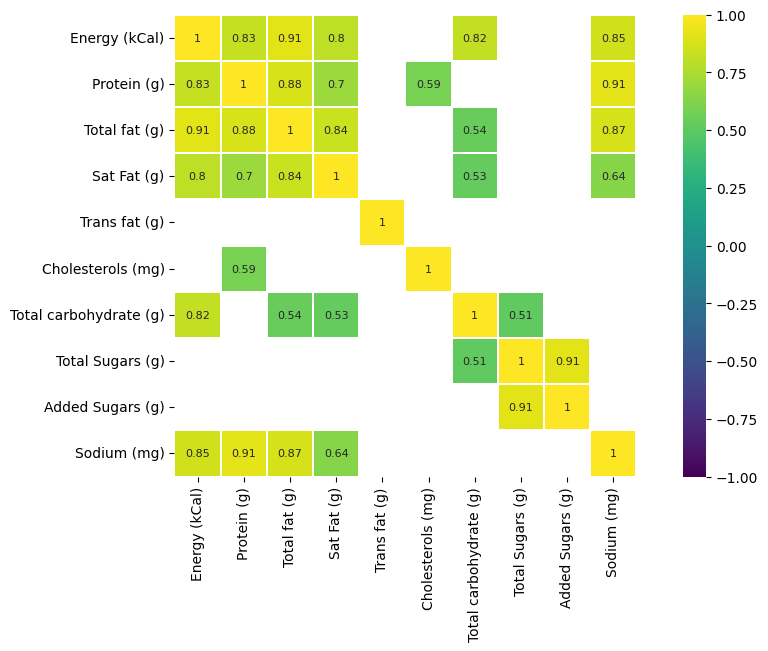

In [58]:
corr = tabela.drop(['Menu Category', 'Menu Items'], axis=1).corr() # examinando as correlaçoes
plt.figure(figsize=(12, 6))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

Text(0.5, 1.0, 'quatidade total gordura')

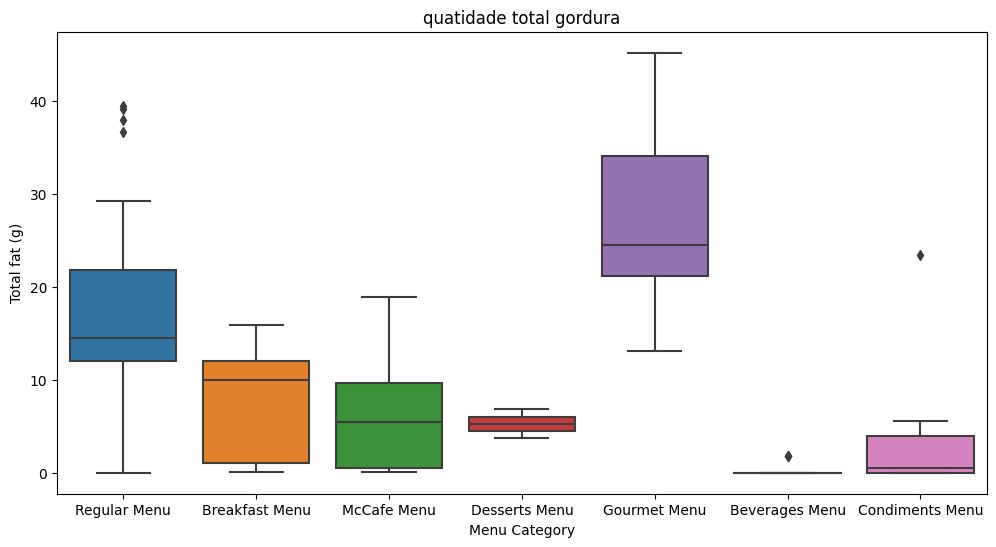

In [59]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Total fat (g)', data=tabela)
plt.title('quatidade total gordura')

Text(0.5, 1.0, 'colesterol quantidade')

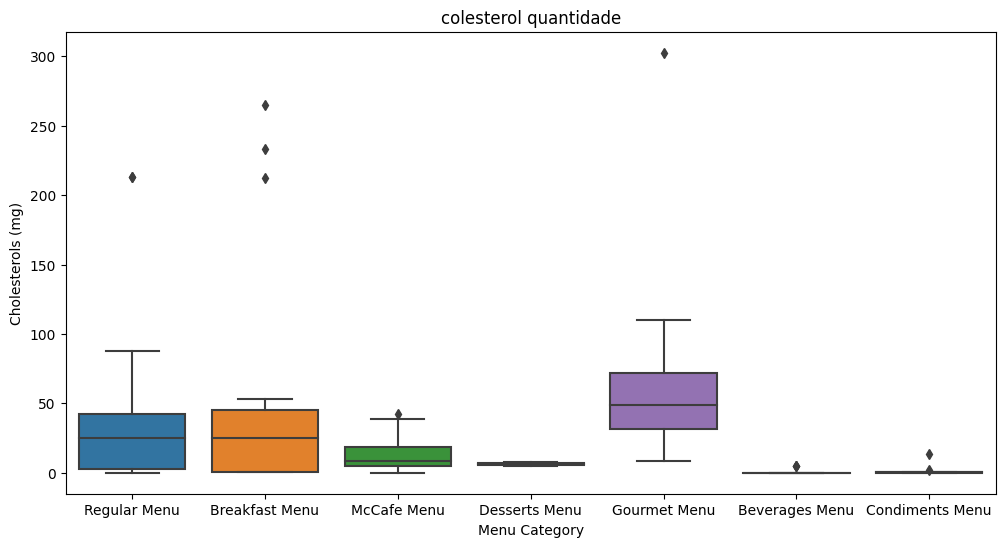

In [60]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Cholesterols (mg)', data=tabela)
plt.title('colesterol quantidade')

Text(0.5, 1.0, 'acucar quantidade')

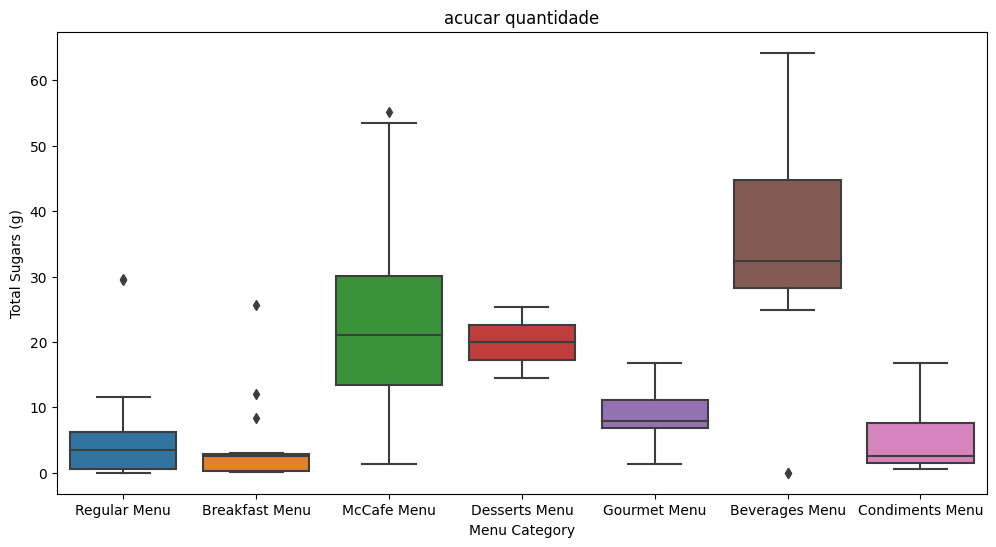

In [61]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Total Sugars (g)', data=tabela)
plt.title('acucar quantidade')

Text(0.5, 1.0, 'sodio mark')

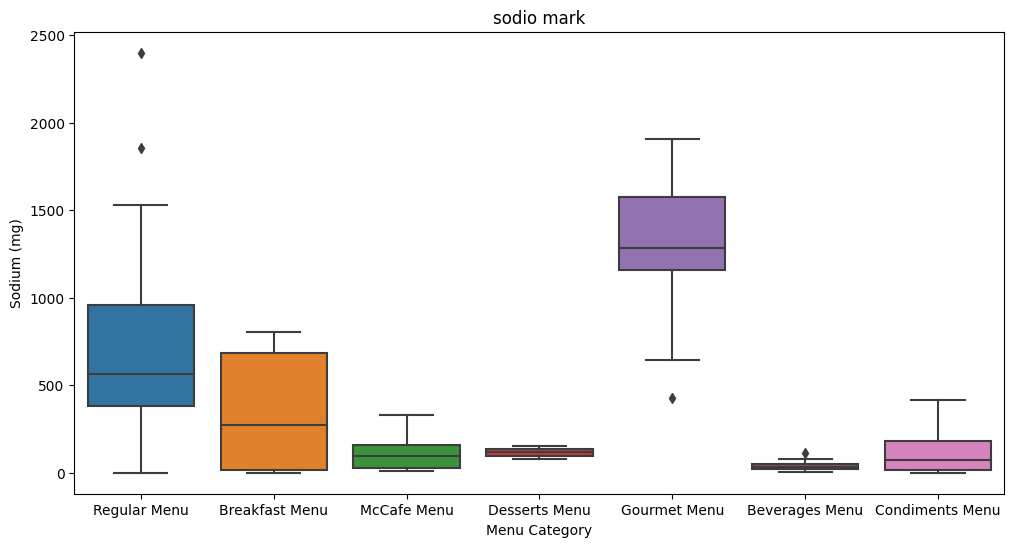

In [62]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Sodium (mg)', data=tabela)
plt.title('sodio mark')

Text(0.5, 1.0, 'calorias')

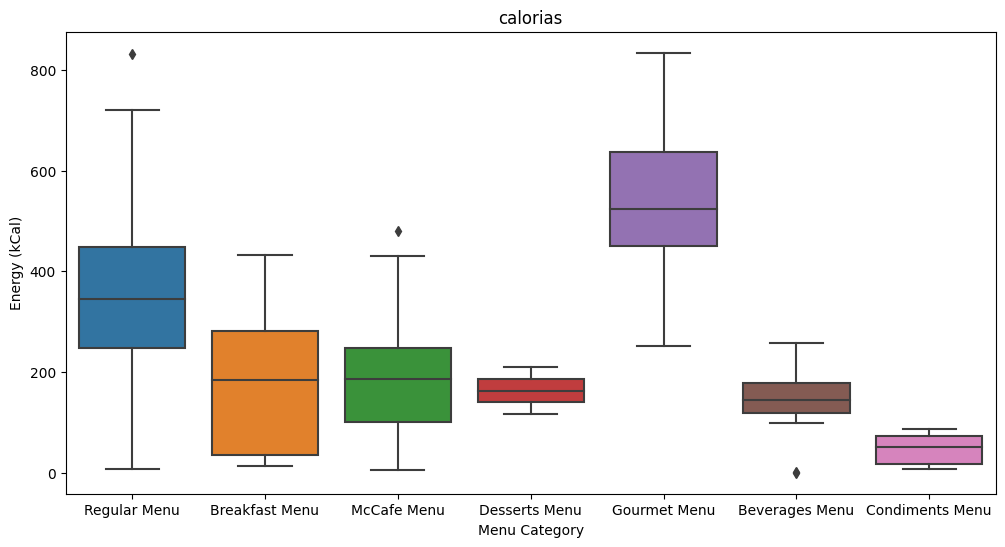

In [63]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Energy (kCal)', data=tabela)
plt.title('calorias')

Text(0.5, 1.0, 'proteina')

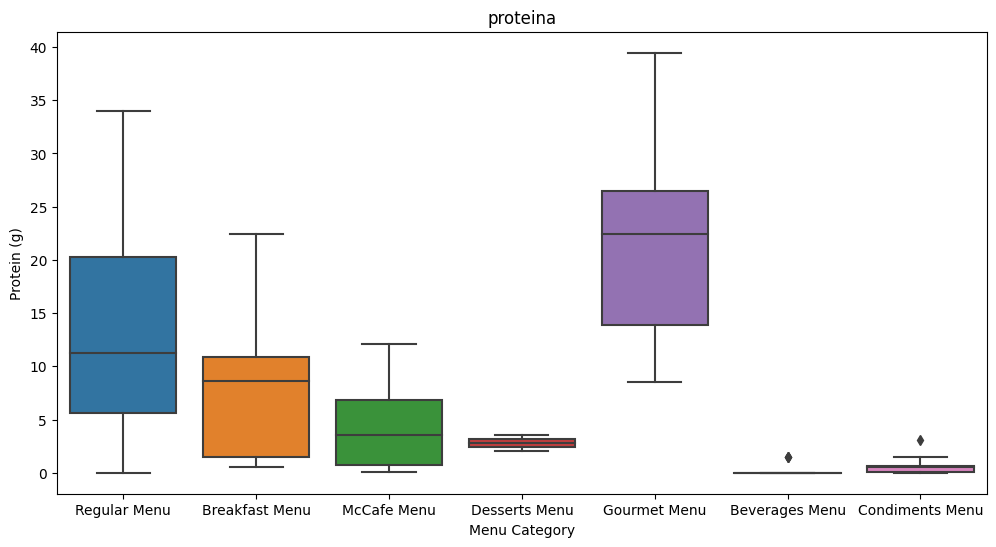

In [64]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Menu Category', y='Protein (g)', data=tabela)
plt.title('proteina')

In [65]:
px.scatter(tabela, x='Total fat (g)', y='Sodium (mg)',size='Total Sugars (g)'
           , color='Menu Category',hover_name='Menu Items', log_x=True, size_max=60)

In [66]:
tabela.groupby('Menu Category')['Menu Items','Per Serve Size','Energy (kCal)'].value_counts()

C:\Users\CASA\AppData\Local\Temp\ipykernel_3568\676096538.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Menu Category    Menu Items                                  Per Serve Size  Energy (kCal)
Beverages Menu   Coke Float                                  286.79 ml       138.76           1
                 Coke Zero Can                               330 ml          0.99             1
                 Medium Fanta Orange                         394 ml          178.88           1
                 Fanta Float                                 286.79 ml       151.56           1
                 Large Coca-Cola                             544 ml          217.36           1
                 Large Fanta Oragne                          544 ml          256.88           1
                 Large Sprite                                544 ml          237.12           1
                 Large Thums-up                              544 ml          197.60           1
                 Medium Coca-Cola                            394 ml          151.36           1
                 Medium Sprite               

In [67]:
tabela[tabela['Menu Items'] =='Cappuccino (R)']

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
50,Breakfast Menu,Cappuccino (R),297.5 ml,183.61,8.79,10.02,7.37,0.3,30.48,16.67,12.05,0.0,129.24


In [68]:
tabela[tabela['Menu Items'] =='Vedica Natural Mineral Water']

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
131,Beverages Menu,Vedica Natural Mineral Water,500 ml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9
